In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('insurance_prediction.csv')

In [3]:
data.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

In [4]:
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152


In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [6]:
data['vehicle_age'] = data['vehicle_age'].str.replace('> 2 Years', 'more than 2 Years')

data['vehicle_age'] = data['vehicle_age'].str.replace('< 1 Year', 'less than 1 Year')

data['previously_insured'] = data['previously_insured'].map({0:'no', 1:'yes'}) 

data['driving_license'] = data['driving_license'].map({0:'no', 1:'yes'})

In [7]:
categorical_list = list(data.dtypes[data.dtypes == 'object'].index)
for c in categorical_list:
    data[c] = data[c].str.lower().str.replace(' ', '_')

In [8]:
data.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [9]:
data['response'].value_counts(normalize=True)

0    0.877437
1    0.122563
Name: response, dtype: float64

In [10]:
categorical = ['gender',
               'previously_insured',
               'vehicle_age', 
               'vehicle_damage']

numerical = ['age', 
             'driving_license', 
             'region_code',
             'annual_premium',
             'policy_sales_channel', 
             'vintage', 
             'response']

In [11]:
data[categorical].describe(include=["O"])

,gender,previously_insured,vehicle_age,vehicle_damage
count,381109,381109,381109,381109
unique,2,2,3,2
top,male,no,1-2_year,yes
freq,206089,206481,200316,192413


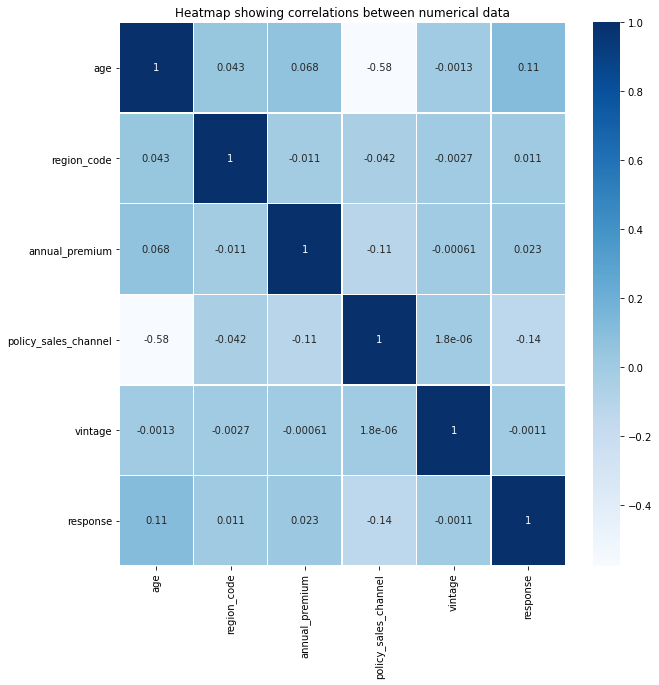

In [12]:
plt.figure(figsize=(10,10))  
sns.heatmap(data[numerical].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [13]:
from IPython.display import display

In [14]:
global_response = data['response'].mean()
global_response

0.12256336113815208

In [15]:
for c in categorical:
    print(c)
    data_group = data.groupby(c)['response'].agg(['mean', 'count'])
    data_group['diff'] = data_group['mean'] - global_response
    data_group['risk'] = data_group['mean'] / global_response
    display(data_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.103902,175020,-0.018661,0.847744
male,0.138411,206089,0.015848,1.129302




previously_insured


,mean,count,diff,risk
previously_insured,,,,
no,0.225454,206481,0.102891,1.839491
yes,0.000905,174628,-0.121659,0.007382




vehicle_age


,mean,count,diff,risk
vehicle_age,,,,
1-2_year,0.173755,200316,0.051192,1.417679
less_than_1_year,0.043705,164786,-0.078858,0.356592
more_than_2_years,0.293746,16007,0.171183,2.396691




vehicle_damage


,mean,count,diff,risk
vehicle_damage,,,,
no,0.005204,188696,-0.117359,0.042461
yes,0.237655,192413,0.115092,1.939042


In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
def mutual_info_insurance_score(series):
    return mutual_info_score(series, data['response'])

In [18]:
mi = data[categorical].apply(mutual_info_insurance_score)
mi.sort_values(ascending=False)

previously_insured    0.079515
vehicle_damage        0.079027
vehicle_age           0.026214
gender                0.001388
dtype: float64